<a href="https://colab.research.google.com/github/royal-programmer/Mental-Fitness-Tracker/blob/main/Mental_Fitness_Tracker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **IMPORTING MODULES**

In [ ]:
import warnings # warnings module is import to ignore unncessary warnings
warnings.filterwarnings('ignore') # this code snippet aims to prevent warning messages from cluttering the output

In [ ]:
import numpy as np # NumPy is a library that enables efficient numerical computations on arrays and matrices, offering extensive mathematical functions.
import pandas as pd # Pandas is a Python library for data manipulation and analysis, providing data structures and operations to efficiently work with structured data.

In [ ]:
import seaborn as sns # Seaborn is a Python data visualization library based on matplotlib, providing a high-level interface for creating informative and attractive statistical graphics.
import matplotlib.pyplot as plt # Matplotlib's pyplot module provides a simple and flexible interface for creating a wide variety of static, animated, and interactive visualizations in Python.
import plotly.express as px # Plotly Express is a high-level data visualization library in Python that makes it easy to create interactive and aesthetically pleasing visualizations with a concise and expressive syntax.

## **CALLING DATA**

### **Importing Dataset from GDrive**

In [ ]:
# # Mounting Drive to get data from drive

# from google.colab import drive # Module to mount the Google Drive at the [/content/drive] directory within the Colab environment.
# drive.mount('/content/drive', force_remount=True)

### **Importing Dataset from Kaggle API key**

In [ ]:
# 1. Get(Upload) the kaggle API token to interact with your kaggle account

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"royalprogrammer","key":"b9376ec160c10140e2f57556d0b955e2"}'}

In [ ]:
#2. Series of commands to set-up for download

!ls -lha kaggle.json
!pip install -q kaggle # installing the kaggle package
!mkdir -p ~/.kaggle # creating .kaggle folder where the key should be placed
!cp kaggle.json ~/.kaggle/ # move the key to the folder
!pwd # checking the present working directory

-rw-r--r-- 1 root root 71 Jul 12 13:33 kaggle.json
/content


In [ ]:
#3. giving rw access (if 401-nathorized)

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#4. Sanity check if able to access kaggle
!kaggle datasets list


ref                                                               title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
alphiree/cardiovascular-diseases-risk-prediction-dataset          Cardiovascular Diseases Risk Prediction Dataset       5MB  2023-07-03 12:12:19           1952         84  1.0              
nelgiriyewithana/countries-of-the-world-2023                      Global Country Information Dataset 2023              23KB  2023-07-08 20:37:33            887         40  1.0              
shuvammandal121/9000-companies-and-its-ratings-dataset            9000 companies and its ratings dataset              202KB  2023-07-12 04:52:05            515         27  1.0              
arnavsmayan/netflix-userbase-dataset              

In [ ]:
#5. Download data command

!kaggle datasets download -d programmerrdai/mental-health-dataset/
!unzip /content/mental-health-dataset.zip

  0% 0.00/1.59M [00:00<?, ?B/s]
100% 1.59M/1.59M [00:00<00:00, 166MB/s]
Archive:  /content/mental-health-dataset.zip
  inflating: mental-and-substance-use-as-share-of-disease.csv  
  inflating: prevalence-by-mental-and-substance-use-disorder.csv  
  inflating: prevalence-of-depression-males-vs-females.csv  
  inflating: share-with-depression.csv  
  inflating: share-with-mental-and-substance-disorders.csv  
  inflating: share-with-mental-or-substance-disorders-by-sex.csv  


## **WORKING WITH DATA**

In [ ]:
df1 = pd.read_csv("/content/prevalence-by-mental-and-substance-use-disorder.csv") # data -> 1
df2 = pd.read_csv("/content/mental-and-substance-use-as-share-of-disease.csv") #data -> 2

In [ ]:
df1 # prevalence-by-mental-and-substance-use-disorder.csv[data -> 1] (getting the data preview with size)

,Entity,Code,Year,Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent),Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent),Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)
0,Afghanistan,AFG,1990,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036
1,Afghanistan,AFG,1991,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250
2,Afghanistan,AFG,1992,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501
3,Afghanistan,AFG,1993,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958
4,Afghanistan,AFG,1994,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779
...,...,...,...,...,...,...,...,...,...,...
6835,Zimbabwe,ZWE,2015,0.209359,0.560882,0.099610,3.315701,0.599604,3.548613,1.734969
6836,Zimbabwe,ZWE,2016,0.209979,0.561768,0.100821,3.324230,0.603658,3.557508,1.689281
6837,Zimbabwe,ZWE,2017,0.210631,0.562612,0.101671,3.330569,0.608096,3.564138,1.651805
6838,Zimbabwe,ZWE,2018,0.211237,0.563283,0.102398,3.317500,0.609065,3.563141,1.686711


In [ ]:
df2 # mental-and-substance-use-as-share-of-disease.csv[data -> 2] (getting the data preview with size)

,Entity,Code,Year,DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)
0,Afghanistan,AFG,1990,1.696670
1,Afghanistan,AFG,1991,1.734281
2,Afghanistan,AFG,1992,1.791189
3,Afghanistan,AFG,1993,1.776779
4,Afghanistan,AFG,1994,1.712986
...,...,...,...,...
6835,Zimbabwe,ZWE,2015,2.193166
6836,Zimbabwe,ZWE,2016,2.279813
6837,Zimbabwe,ZWE,2017,2.364265
6838,Zimbabwe,ZWE,2018,2.472949


In [ ]:
merged_data = pd.merge(df1,df2) # merging both datas as they share same ideation of Fitness
merged_data # displaying values of merged data with size

,Entity,Code,Year,Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent),Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent),Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent),DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)
0,Afghanistan,AFG,1990,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036,1.696670
1,Afghanistan,AFG,1991,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250,1.734281
2,Afghanistan,AFG,1992,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501,1.791189
3,Afghanistan,AFG,1993,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958,1.776779
4,Afghanistan,AFG,1994,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779,1.712986
...,...,...,...,...,...,...,...,...,...,...,...
6835,Zimbabwe,ZWE,2015,0.209359,0.560882,0.099610,3.315701,0.599604,3.548613,1.734969,2.193166
6836,Zimbabwe,ZWE,2016,0.209979,0.561768,0.100821,3.324230,0.603658,3.557508,1.689281,2.279813
6837,Zimbabwe,ZWE,2017,0.210631,0.562612,0.101671,3.330569,0.608096,3.564138,1.651805,2.364265
6838,Zimbabwe,ZWE,2018,0.211237,0.563283,0.102398,3.317500,0.609065,3.563141,1.686711,2.472949


## **DATA CLEANSING**

In [ ]:
merged_data.isnull().sum() # finding empty cells or missing data

Entity                                                                                               0
Code                                                                                               690
Year                                                                                                 0
Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)                             0
Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)                          0
Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)                          0
Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)                         0
Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)                        0
Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)                      0
Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (P

In [ ]:
merged_data.drop(columns = 'Code', inplace = True) # dropping the column(s) that contain empty cells or missing data
merged_data # displaying the values of merged data after dropping column 'Code' with size

,Entity,Year,Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent),Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent),Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent),DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)
0,Afghanistan,1990,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036,1.696670
1,Afghanistan,1991,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250,1.734281
2,Afghanistan,1992,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501,1.791189
3,Afghanistan,1993,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958,1.776779
4,Afghanistan,1994,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779,1.712986
...,...,...,...,...,...,...,...,...,...,...
6835,Zimbabwe,2015,0.209359,0.560882,0.099610,3.315701,0.599604,3.548613,1.734969,2.193166
6836,Zimbabwe,2016,0.209979,0.561768,0.100821,3.324230,0.603658,3.557508,1.689281,2.279813
6837,Zimbabwe,2017,0.210631,0.562612,0.101671,3.330569,0.608096,3.564138,1.651805,2.364265
6838,Zimbabwe,2018,0.211237,0.563283,0.102398,3.317500,0.609065,3.563141,1.686711,2.472949


In [ ]:
merged_data.shape # checking number of row and columns of merged data after dropping

(6840, 10)

In [ ]:
merged_data.set_axis(['Country','Year','Schizophrenia','Bipolar','Eating','Anxiety','Drug','Depressive','Alcohol','Mental'], axis = "columns", inplace = True)
merged_data # renaming attributes for better and easier understanding of data and displaying its first 5 values

,Country,Year,Schizophrenia,Bipolar,Eating,Anxiety,Drug,Depressive,Alcohol,Mental
0,Afghanistan,1990,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036,1.696670
1,Afghanistan,1991,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250,1.734281
2,Afghanistan,1992,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501,1.791189
3,Afghanistan,1993,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958,1.776779
4,Afghanistan,1994,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779,1.712986
...,...,...,...,...,...,...,...,...,...,...
6835,Zimbabwe,2015,0.209359,0.560882,0.099610,3.315701,0.599604,3.548613,1.734969,2.193166
6836,Zimbabwe,2016,0.209979,0.561768,0.100821,3.324230,0.603658,3.557508,1.689281,2.279813
6837,Zimbabwe,2017,0.210631,0.562612,0.101671,3.330569,0.608096,3.564138,1.651805,2.364265
6838,Zimbabwe,2018,0.211237,0.563283,0.102398,3.317500,0.609065,3.563141,1.686711,2.472949


## **VISUALIZATION**

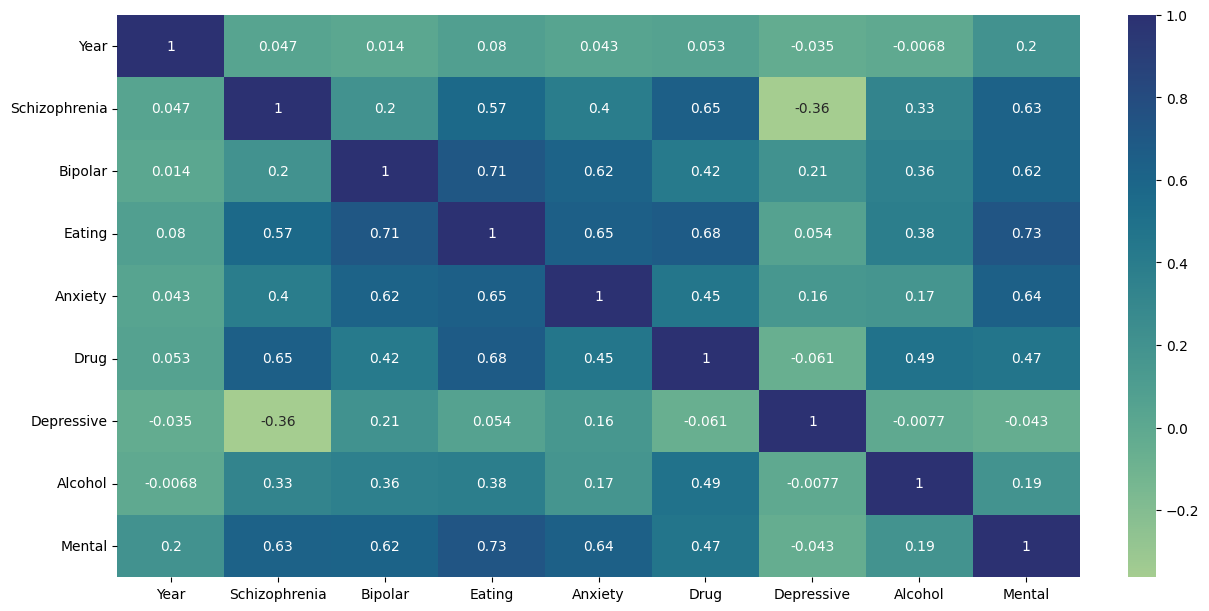

In [ ]:
# ploting heatmap using seaborn
plt.figure(figsize = (12,6), layout = "constrained")
sns.heatmap(merged_data.corr(), annot=True, cmap="crest")
plt.show()

<Figure size 640x480 with 0 Axes>

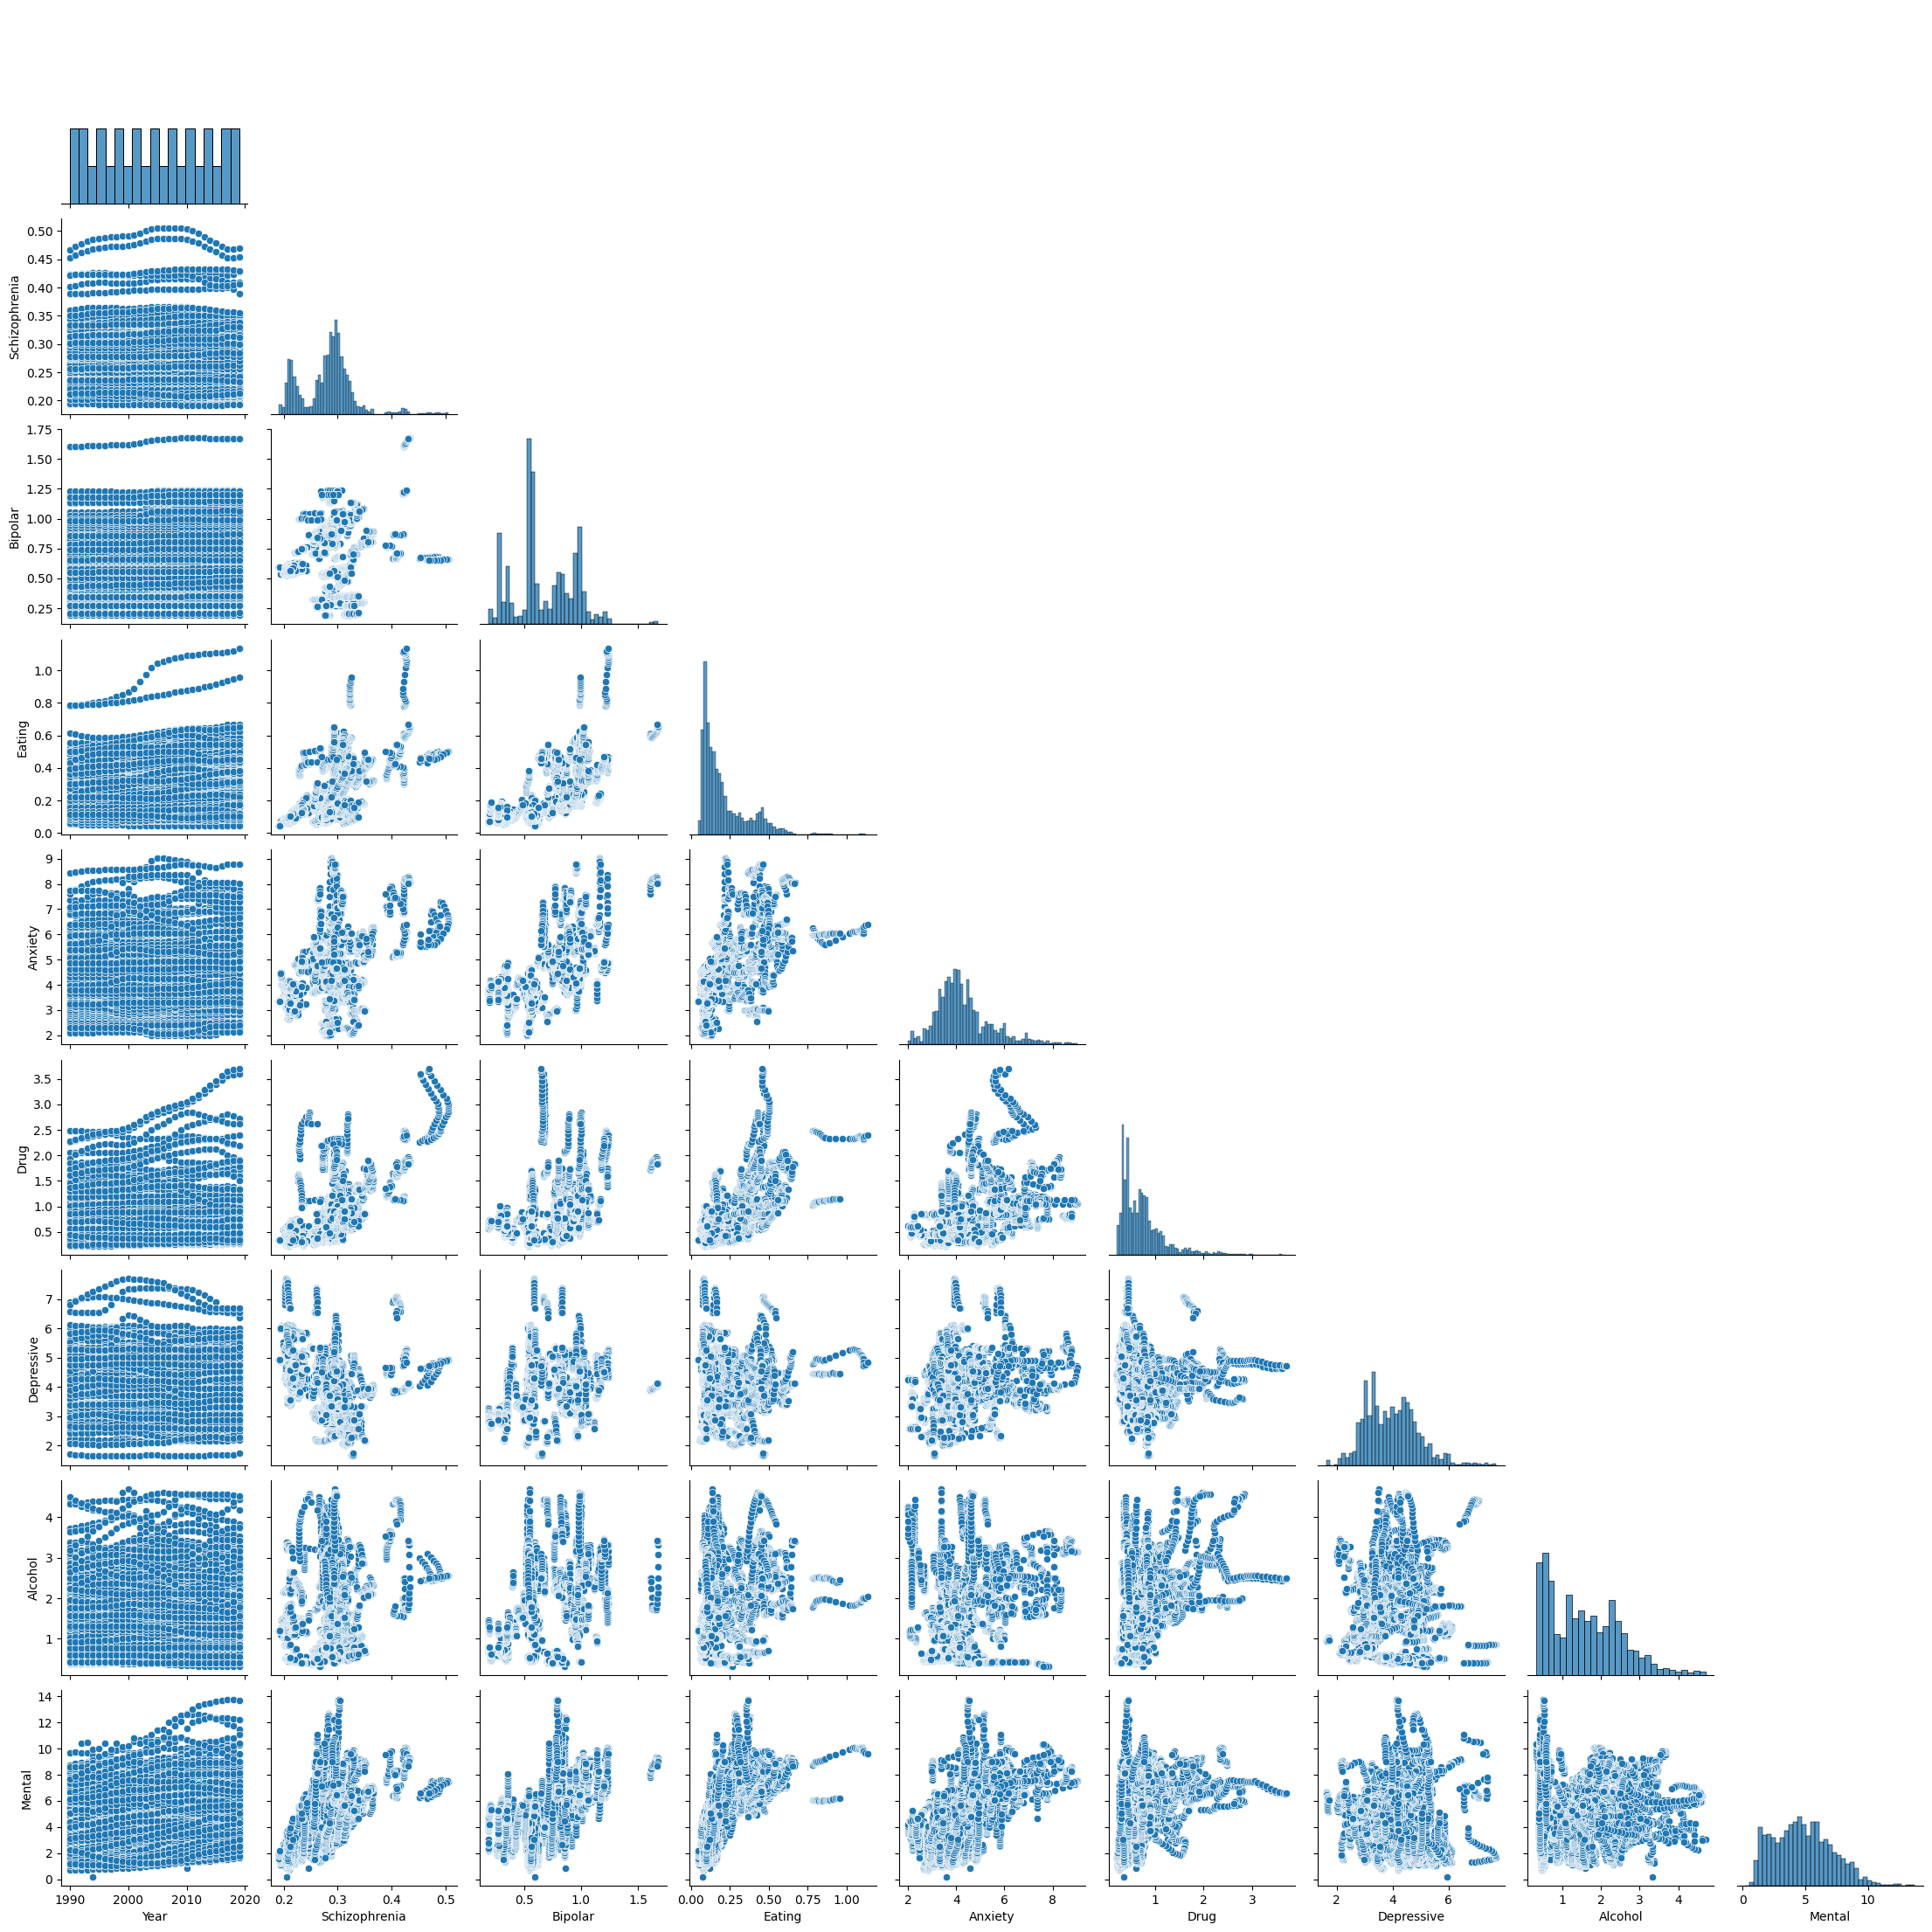

In [ ]:
# ploting pairplot using seaborn
plt.figure(layout = "compressed")
sns.pairplot(merged_data, corner = True)
plt.show()

In [ ]:
# mean values of Mental disorder Data
mean = merged_data["Mental"].mean()
mean

4.8180618117506135

In [ ]:
# ploting pie chart using plotly
fig = px.pie(merged_data, values = "Mental", names = "Year")
fig.show()

In [ ]:
# ploting line chart using plotly
fig = px.line(merged_data, x = "Year", y = "Mental", color = "Country", markers = True, color_discrete_sequence = ['red','lemonchiffon'], template = "plotly_dark")
fig.show()

In [ ]:
# copying merged data to another variable to perform operation
df = merged_data
df.info() # diaplaying the data information

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6840 entries, 0 to 6839
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country        6840 non-null   object 
 1   Year           6840 non-null   int64  
 2   Schizophrenia  6840 non-null   float64
 3   Bipolar        6840 non-null   float64
 4   Eating         6840 non-null   float64
 5   Anxiety        6840 non-null   float64
 6   Drug           6840 non-null   float64
 7   Depressive     6840 non-null   float64
 8   Alcohol        6840 non-null   float64
 9   Mental         6840 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 587.8+ KB


In [ ]:
# reformatting the data checking up for invalid datatypes to avoid errors while evaluation
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
for i in df.columns:
  if df[i].dtype == 'object':
    df[i]=l.fit_transform(df[i])
df.info(),
df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6840 entries, 0 to 6839
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country        6840 non-null   int64  
 1   Year           6840 non-null   int64  
 2   Schizophrenia  6840 non-null   float64
 3   Bipolar        6840 non-null   float64
 4   Eating         6840 non-null   float64
 5   Anxiety        6840 non-null   float64
 6   Drug           6840 non-null   float64
 7   Depressive     6840 non-null   float64
 8   Alcohol        6840 non-null   float64
 9   Mental         6840 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 587.8 KB


(6840, 10)

In [ ]:
# spliting the data into train:test::.80:.20
x = df.drop("Mental", axis = 1) # x contains the data without the Mental column
y = df["Mental"]  # y contains just the Mental column

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = .20, random_state=2) # both x and y is divided into .80 and .20 parts for train and test

In [ ]:
# printing the splitted data [train dataset and test dataset]
print(f'xtrain data size: {xtrain.shape}, xtest data size: {xtest.shape}')
print(f"ytrain data size: {ytrain.shape}, ytest data size: {ytest.shape}")

xtrain data size: (5472, 9), xtest data size: (1368, 9)
ytrain data size: (5472,), ytest data size: (1368,)


## **Model Training**

In [ ]:
# Performing Linear Regression Model on the train dataset
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
lr = LinearRegression()
lr.fit(xtrain, ytrain)

ytrain_pred_lr = lr.predict(xtrain)
mse_lr = mean_squared_error(ytrain, ytrain_pred_lr)
rmse_lr = (np.sqrt(mse_lr))
r2_lr = r2_score(ytrain, ytrain_pred_lr)

print("Performing Linear Regression Model")
print("----------------------------------")
print(f"Mean Square Error: {mse_lr}")
print(f"Root Mean Square Error: {rmse_lr}")
print(f"R2 Score of the model: {r2_lr}")

Performing Linear Regression Model
----------------------------------
Mean Square Error: 1.389959372405798
Root Mean Square Error: 1.1789653821914357
R2 Score of the model: 0.7413245790025275


In [ ]:
# Performing Random Forest Resgression Model on the train dataset
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(xtrain, ytrain)

ytrain_pred_rf = rf.predict(xtrain)
mse_rf = mean_squared_error(ytrain, ytrain_pred_rf)
rmse_rf = (np.sqrt(mse_rf))
r2_rf = r2_score(ytrain, ytrain_pred_rf)

print("Performing Random Forest Regression Model")
print("-----------------------------------------")
print(f"Mean Square Error: {mse_rf}")
print(f"Root Mean Square Error: {rmse_rf}")
print(f"R2 Score of the model: {r2_rf}")

Performing Random Forest Regression Model
-----------------------------------------
Mean Square Error: 0.0050885896458964484
Root Mean Square Error: 0.07133435109325975
R2 Score of the model: 0.9990529988897032


## **Evaluation**

In [ ]:
# Performing Linear Regression Model on the test dataset

ytest_pred_lr = lr.predict(xtest)
mse_lr = mean_squared_error(ytest, ytest_pred_lr)
rmse_lr = (np.sqrt(mse_lr))
r2_lr = r2_score(ytest, ytest_pred_lr)

print("Performing Linear Regression Model")
print("----------------------------------")
print(f"Mean Square Error: {mse_lr}")
print(f"Root Mean Square Error: {rmse_lr}")
print(f"R2 Score of the model: {r2_lr}")
print('\n\n')

# Random Forest Regression Model on the test dataset

ytest_pred_rf = rf.predict(xtest)
mse_rf = mean_squared_error(ytest, ytest_pred_rf)
rmse_rf = (np.sqrt(mse_rf))
r2_rf = r2_score(ytest, ytest_pred_rf)

print("Performing Random Forest Regression Model")
print("-----------------------------------------")
print(f"Mean Square Error: {mse_rf}")
print(f"Root Mean Square Error: {rmse_rf}")
print(f"R2 Score of the model: {r2_rf}")

Performing Linear Regression Model
----------------------------------
Mean Square Error: 1.1357545319272384
Root Mean Square Error: 1.0657178481789813
R2 Score of the model: 0.7638974087055272



Performing Random Forest Regression Model
-----------------------------------------
Mean Square Error: 0.03154380953768386
Root Mean Square Error: 0.17760577000110064
R2 Score of the model: 0.993442619015124
